In [ ]:
#oracle will flip the sign of the input if the input is a winner
# change states with unitary matrics
# controlled Z to flip state
# grovers difusion;

Prepare the qubits by putting them in uniform superposition, $|s\rangle$ by applying $H^{ \bigotimes n }|0 \rangle$.
Apply the Oracle $O$ to mark the target element by negating its sign such hat $O|x\rangle = -|x\rangle$.
Apply the Grover diffusion operator $D$ to amplify the probability amplitude of the target element.
Repeat steps 2-3 for about $\sqrt N$ times and then perform measurements to find the target element.


In [ ]:
#--------------------------------------------------------------------

In [9]:
#Import libraries from qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
from qiskit.providers.ibmq import least_busy
import math

In [1]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg'
from qiskit.aqua import QuantumInstance#, run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle


In [2]:
#Input function encoding
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

### 2 Qubit Grover's Search Algorithm Circuit

In [15]:
# Initialising the circuit: defining 2 qubits
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')

# Create the quantum circuit
smallGrov = QuantumCircuit(q,c)

# Step 1: Apply a Hadarmard gate to all qubits  
smallGrov.h(q)

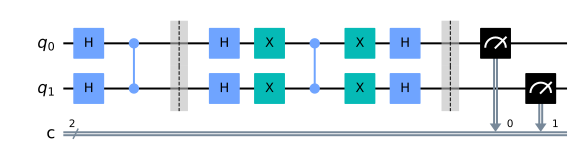

In [16]:
# Step 2: Implement the Oracle circuit for state |11> + Grover diffusion
smallGrov.cz(q[1],q[0])
smallGrov.barrier(q)

smallGrov.h(q)
smallGrov.x(q)
smallGrov.cz(q[1],q[0])
smallGrov.x(q)
smallGrov.h(q)
smallGrov.barrier(q)


## Apply measurement Dials
smallGrov.measure(q[0],c[0])
smallGrov.measure(q[1],c[1])


smallGrov.draw(output='mpl')

RESULT:  {'11': 2048} 



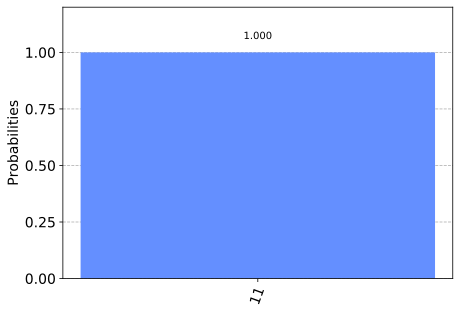

In [17]:
# Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(smallGrov, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [37]:
# Step 4: Run on real device from IBM - load account and get least busy backend

provider = IBMQ.load_account()
device = least_busy(provider.backends(simulator=False))
print("Running on current least busy device: ", device)

from qiskit.tools.monitor import job_monitor
job = execute(smallGrov, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

ibmqfactory.load_account:WARNING:2021-08-31 08:30:15,809: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_manila
Job Status: job has successfully run


In [38]:
# Print results from quantum machine

results = job.result()
answer = results.get_counts(qc)
plot_histogram(answer)

QiskitError: 'Data for experiment "circuit8" could not be found.'

### 4 Qubit Grover's Search Algorithm Circuit

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')


# Create the quantum circuit
circuit = QuantumCircuit(q, creg_c)



## Step 1: Apply a Hadarmard gate to all qubits  
circuit.h(q)
#circuit.h(qreg_q[0])
#circuit.h(qreg_q[1])
#circuit.h(qreg_q[2])
#circuit.h(qreg_q[3])

/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.


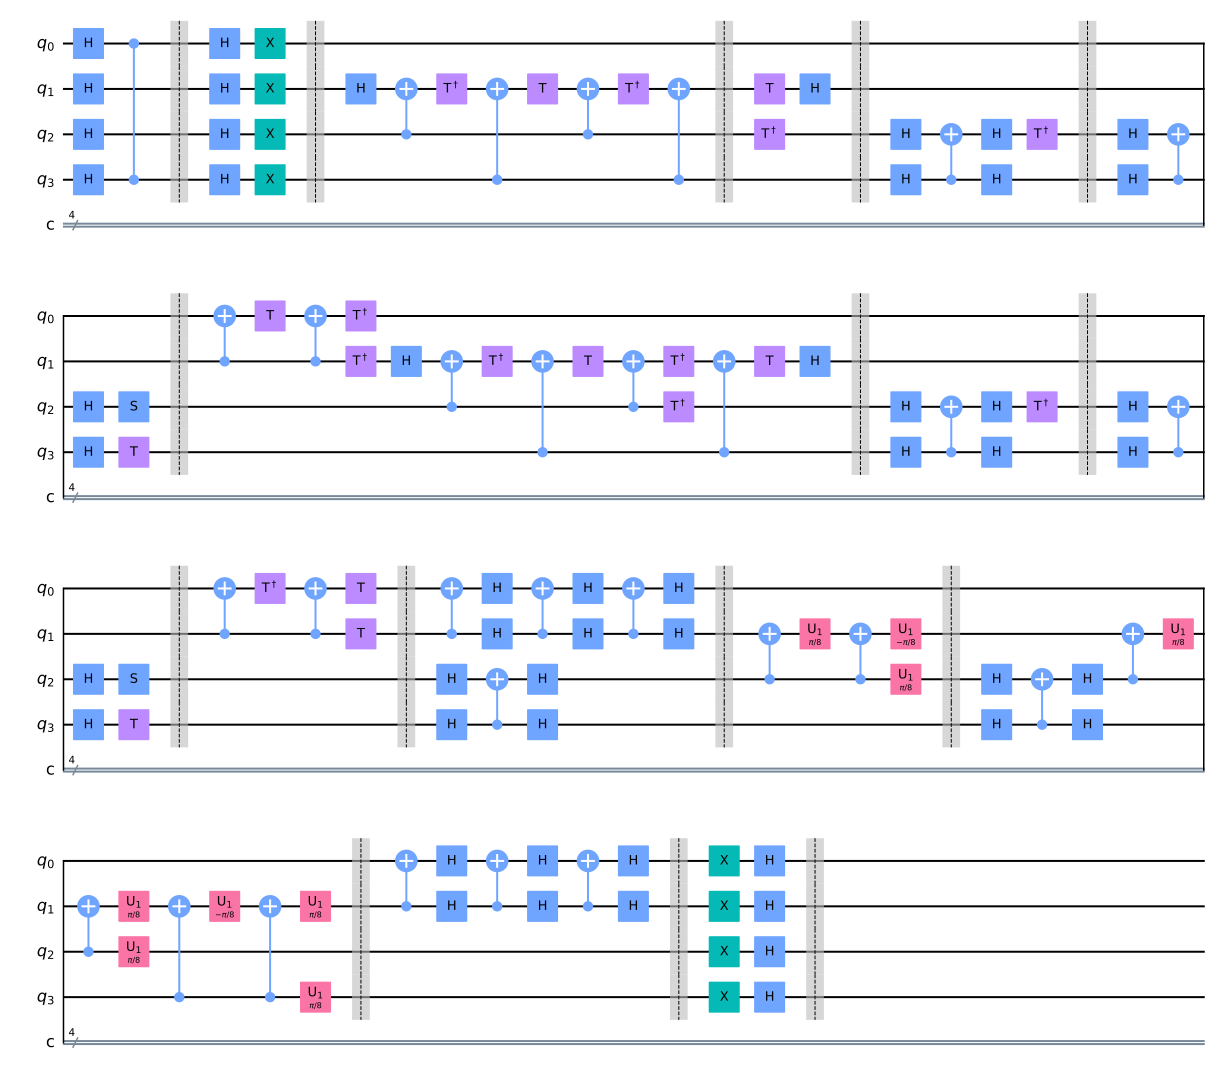

In [21]:
##Step 2: Implement the Oracle circuit for state |111> and Grover's diffusion
circuit.cz(q[3],q[0])
circuit.barrier(q)

circuit.h(q)
circuit.x(q)
circuit.barrier(q)

circuit.h(q[1])
circuit.cx(q[2],q[1])
circuit.tdg(q[1])
circuit.cx(q[3],q[1])
circuit.t(q[1])
circuit.cx(q[2],q[1])
circuit.tdg(q[1])
circuit.cx(q[3],q[1])
circuit.barrier(q)
circuit.t(q[1])
circuit.tdg(q[2])
circuit.h(q[1])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.tdg(q[2])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.s(q[2])
circuit.t(q[3])
circuit.barrier(q)
circuit.cx(q[1],q[0])
circuit.t(q[0])
circuit.cx(q[1],q[0])
circuit.tdg(q[0])
circuit.tdg(q[1])
circuit.h(q[1])
circuit.cx(q[2],q[1])
circuit.tdg(q[1])
circuit.cx(q[3],q[1])
circuit.t(q[1])
circuit.cx(q[2],q[1])
circuit.tdg(q[1])
circuit.cx(q[3],q[1])
circuit.t(q[1])
circuit.tdg(q[2])
circuit.h(q[1])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.tdg(q[2])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.s(q[2])
circuit.t(q[3])
circuit.barrier(q)
circuit.cx(q[1],q[0])
circuit.tdg(q[0])
circuit.cx(q[1],q[0])
circuit.t(q[0])
circuit.t(q[1])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.barrier(q)
circuit.cx(q[2],q[1])
circuit.u1(pi/8,q[1])
circuit.cx(q[2],q[1])
circuit.u1(-pi/8,q[1])
circuit.u1(pi/8,q[2])
circuit.barrier(q)
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[3],q[2])
circuit.h(q[2])
circuit.h(q[3])
circuit.cx(q[2],q[1])
circuit.u1(pi/8,q[1])
circuit.cx(q[2],q[1])
circuit.u1(pi/8,q[1])
circuit.u1(pi/8,q[2])
circuit.cx(q[3],q[1])
circuit.u1(-pi/8,q[1])
circuit.cx(q[3],q[1])
circuit.u1(pi/8,q[1])
circuit.u1(pi/8,q[3])
circuit.barrier(q)
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.cx(q[1],q[0])
circuit.h(q[0])
circuit.h(q[1])
circuit.barrier(q)

circuit.x(q)
circuit.h(q)
circuit.barrier(q)

circuit.draw(output='mpl')

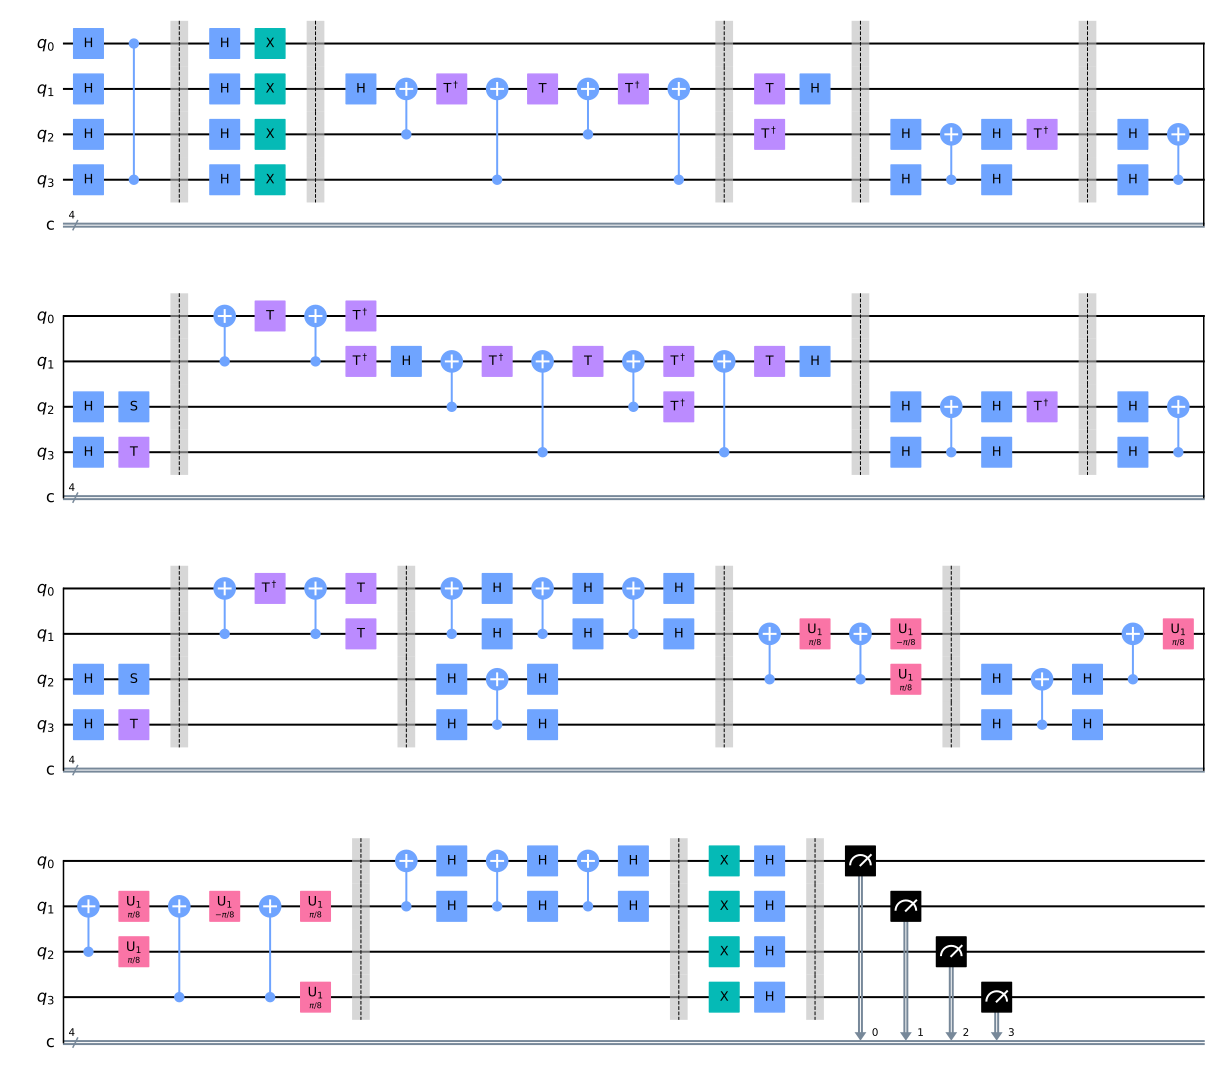

In [23]:
## Don't forget about the measurement gates!
circuit.measure(q[0],creg_c[0])
circuit.measure(q[1],creg_c[1])
circuit.measure(q[2],creg_c[2])
circuit.measure(q[3],creg_c[3])

circuit.draw(output='mpl')

In [ ]:

#Another option would be to make use of qiskits 
#multi qubit CCNOT gate: speficy the control gates then the target[qubit 3]
MCMT.ccx(q[2], q[0], q[1], q[3], ctl1=None, ctl2=None, tgt=None)

In [30]:
circuit = LogicalExpressionOracle(input_3sat)
grover = Grover(circuit)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots = 1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2, -3]


/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:608: DeprecationWarning: result deprecated, use assignment property.
  warnings.warn('result deprecated, use assignment property.', DeprecationWarning)


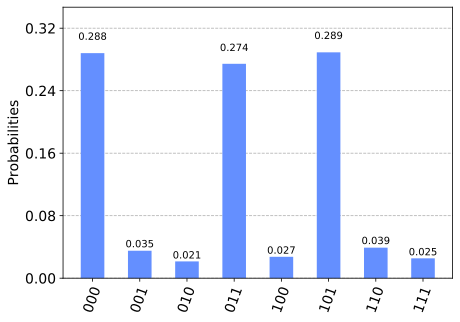

In [6]:
plot_histogram(result['measurement'])

In [31]:
# Load our saved IBMQ accounts and get the ibmq_16_melbourne backend
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
real_dev =  least_busy(provider.backends(simulator=False))

/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [ ]:
from qiskit import execute
from qiskit.tools.monitor import job_monitor
job = execute(circuit, backend=real_dev, shots=4024, max_credits=10)
job_monitor(job)

#### Citations: References and Sources Used


Sources Used
Original Paper by Lov Grover: https://arxiv.org/abs/quant-ph/9605043

Circuit structure: https://cis.temple.edu/~boji/papers/REU2018.pdf

In [ ]:
#--------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------

In [10]:

job = execute(circuit, backend = real_dev, shots=8192)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

NameError: name 'circuit' is not defined

In [2]:
nqubits=3 # no. of qubits
circuit= QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])


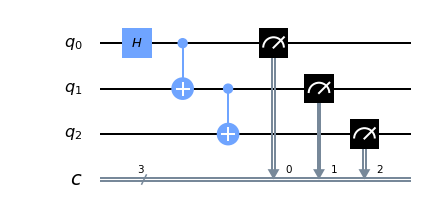

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots= 20000).result()

In [5]:
from qiskit.visualization import plot_histogram

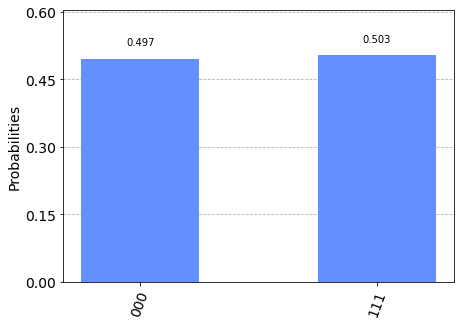

In [6]:
plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub= 'ibm-q')
device = provider.get_backend('ibmqx2')

In [ ]:
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

603829c16ccc8fc98158d84f
Job Status: job is queued (7)     

In [2]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

NameError: name 'job' is not defined

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [1]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel= 'measerrormitigational')

NameError: name 'complete_meas_cal' is not defined

In [ ]:
# gives a series of calibrtion erroes to run

In [ ]:
len(cal_circuits) # how many circuits

In [ ]:
cal_job =execute(cal_circuits,
                 backend= device,
                 shots= 1024,
                 optimization_level =0 # makes sure cuircuits aerenot changed as we transfer them from here to real device
                
print(cal_job.job_id())
job_monitor(job)
cal_result = cal_jib.result()

In [ ]:
plot_histogram(
cal_result.get_counts(cal_circuits[3])
)

In [ ]:
meas_fitter =CompleteMeasFitter(cal_results, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
mitigated_result = meas_filter.apply(device_result)

In [ ]:
device_counts = device_result.get_counts(circuit)
mitgated_counts = mitgated_result.get_counts(circuit)
plot_histogram([device_counts, mitgated_counts], legend=['device, noisy', 'device, mitigated'])